In [2]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
bank = pd.read_csv("bank.csv")
df = bank.copy()
df = df.dropna()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      2018 non-null   int64  
 1   loan     2018 non-null   int64  
 2   mortdue  2018 non-null   float64
 3   value    2018 non-null   float64
 4   reason   2018 non-null   object 
 5   job      2018 non-null   object 
 6   yoj      2018 non-null   float64
 7   derog    2018 non-null   float64
 8   delinq   2018 non-null   float64
 9   clage    2018 non-null   float64
 10  ninq     2018 non-null   float64
 11  clno     2018 non-null   float64
 12  debtinc  2018 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 205.0+ KB


In [4]:
df.corr()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
bad,1.000000,-0.026184,-0.025103,-0.031318,-0.050937,0.235700,0.281008,-0.090830,0.109951,-0.012602,0.251064
loan,-0.026184,1.000000,0.282651,0.379027,0.098801,-0.024812,-0.045501,0.064738,0.054942,0.097961,0.157596
mortdue,-0.025103,0.282651,1.000000,0.867368,-0.092880,-0.049734,-0.041545,0.132383,0.020796,0.343742,0.194930
value,-0.031318,0.379027,0.867368,1.000000,-0.003837,-0.055510,-0.066153,0.194847,-0.021380,0.234563,0.138076
yoj,-0.050937,0.098801,-0.092880,-0.003837,1.000000,-0.054276,0.043922,0.222843,-0.049494,0.001370,-0.047849
derog,0.235700,-0.024812,-0.049734,-0.055510,-0.054276,1.000000,0.167600,-0.059206,0.153468,0.059943,0.063426
delinq,0.281008,-0.045501,-0.041545,-0.066153,0.043922,0.167600,1.000000,0.039487,0.013890,0.099542,0.066169
clage,-0.090830,0.064738,0.132383,0.194847,0.222843,-0.059206,0.039487,1.000000,-0.083368,0.184581,-0.046713
ninq,0.109951,0.054942,0.020796,-0.021380,-0.049494,0.153468,0.013890,-0.083368,1.000000,0.081600,0.152820
clno,-0.012602,0.097961,0.343742,0.234563,0.001370,0.059943,0.099542,0.184581,0.081600,1.000000,0.155147


### Support vector classifier to Bank Data

In [5]:
dms = pd.get_dummies(df[["reason", "job"]])

y = df["bad"]
X_ = df.drop(["bad", "reason", "job"], axis=1)
X = pd.concat([X_, dms], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
svm_model = SVC(kernel='linear').fit(X_train, y_train)

In [7]:
y_pred = svm_model.predict(X_test)

In [8]:
accuracy_score(y_test, y_pred)

0.9207920792079208

In [11]:
import Functions as f
dt = f.dataPreprocessing("dataset.xlsx")

In [13]:
nv = dt.numeric_variables()

### support vector regression to forex

In [10]:
dms = pd.get_dummies(df['ind_109'])
y = df["90_target"]
X_ = df.drop(['90_target','20_target', '50_target', 'ind_109', 'ind_420', 'ind_422'], axis=1).astype("float64")
X=pd.concat([X_,dms], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [16]:
from sklearn.svm import SVR

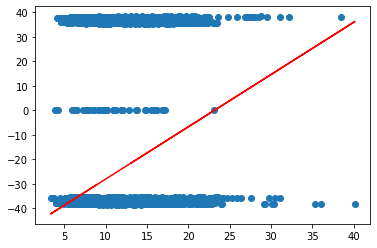

In [24]:
col = "ind_17"

X_train_ = pd.DataFrame(X_train[col])
X_test_ = pd.DataFrame(X_test[col])
svr_model = SVR("linear").fit(X_train_, y_train)
y_pred = svr_model.predict(X_train_)
plt.scatter(X_train_, y_train)
plt.plot(X_train_, y_pred, color="r")

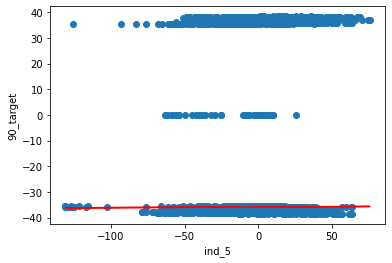

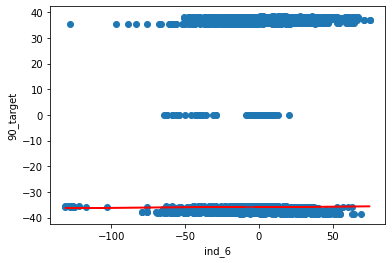

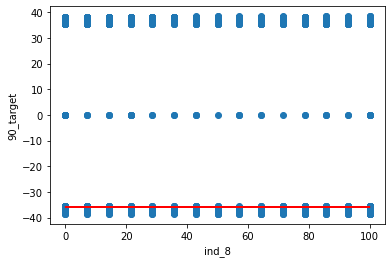

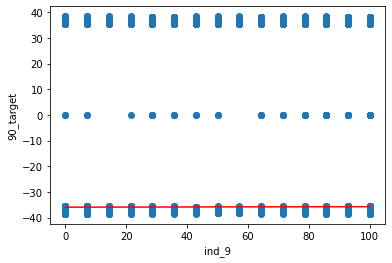

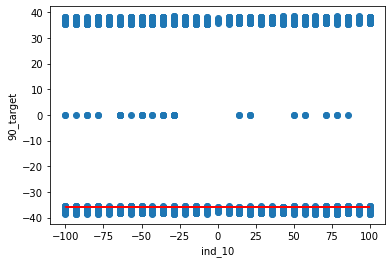

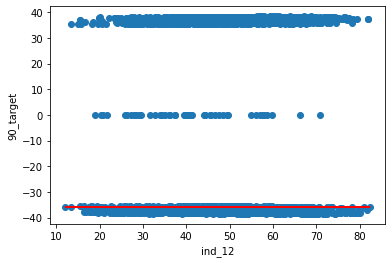

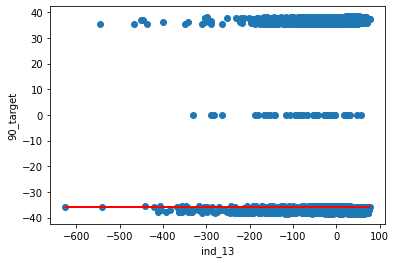

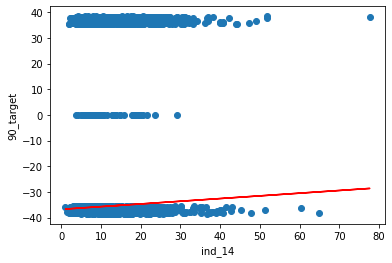

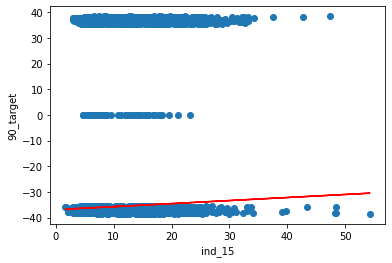

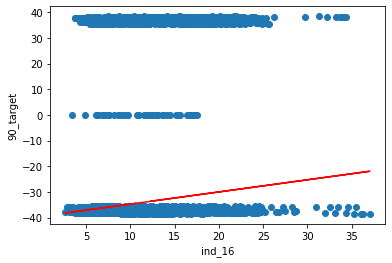

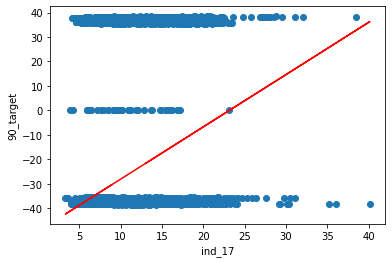

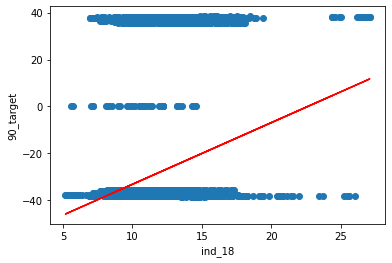

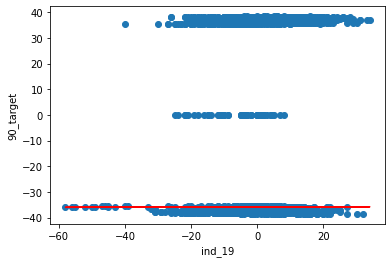

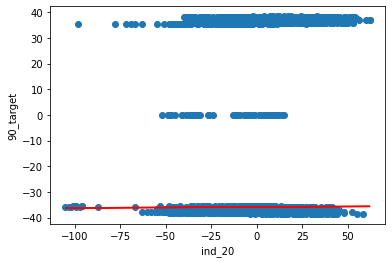

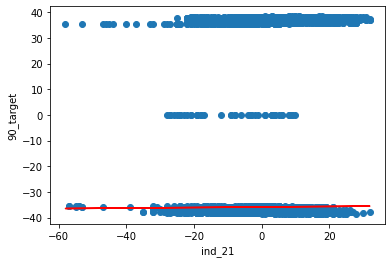

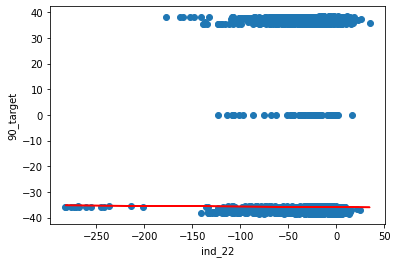

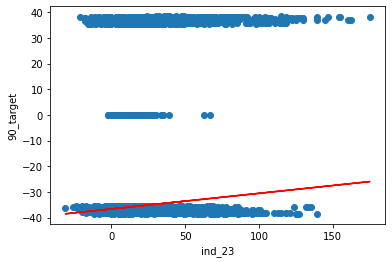

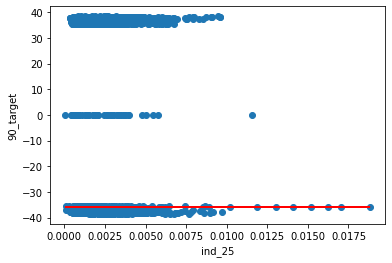

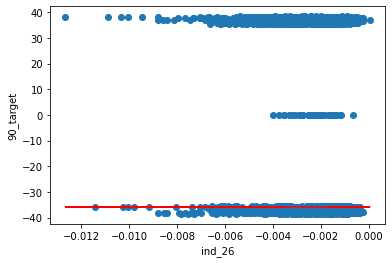

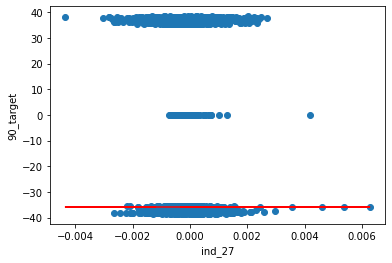

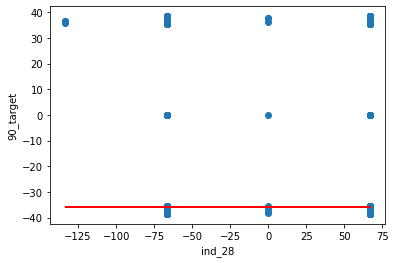

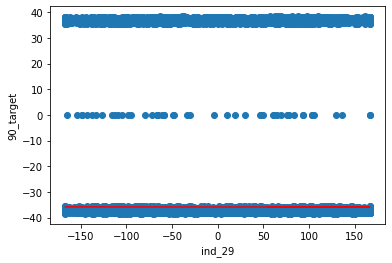

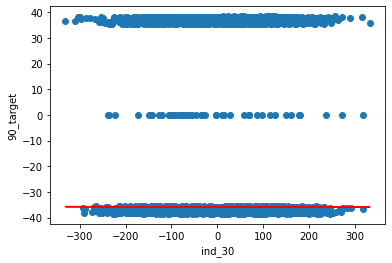

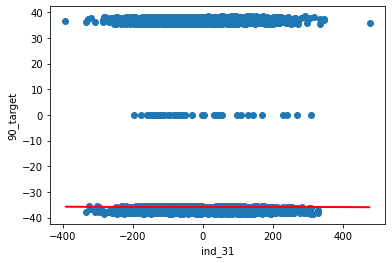

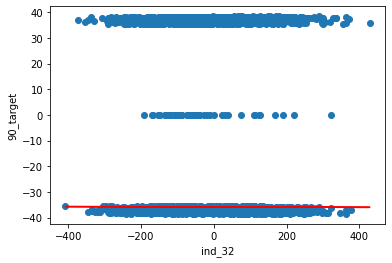

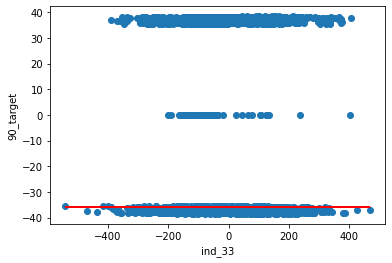

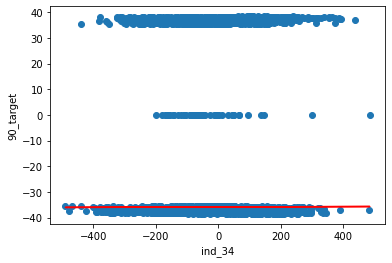

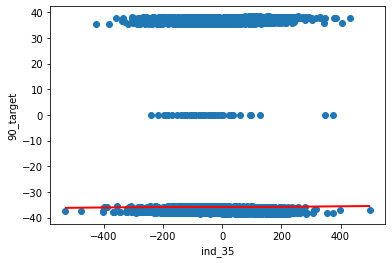

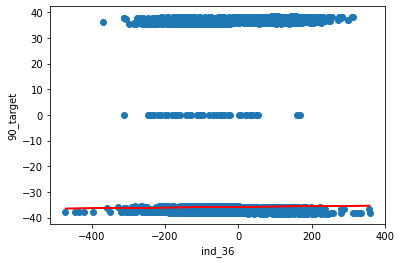

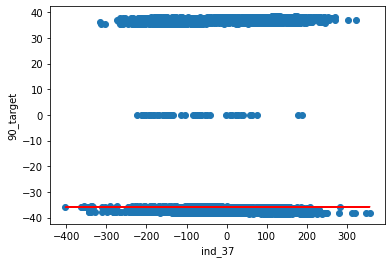

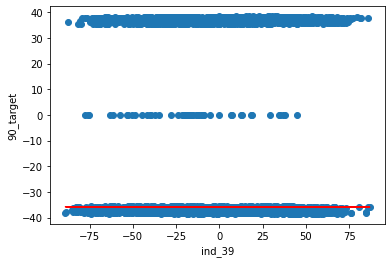

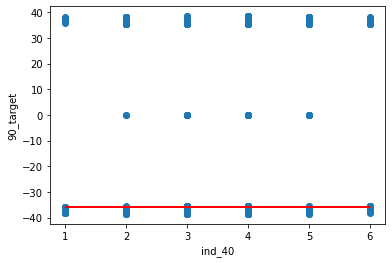

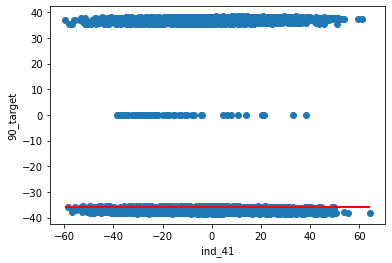

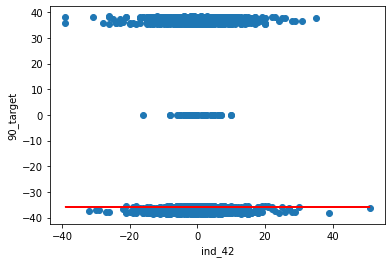

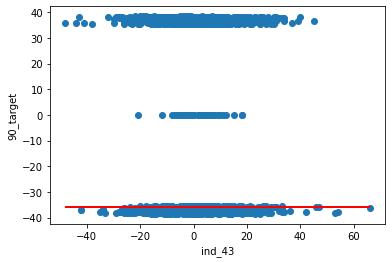

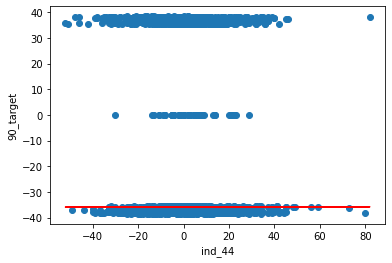

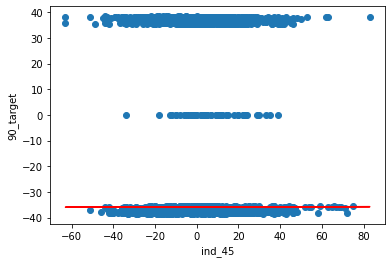

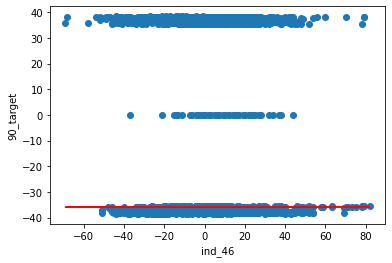

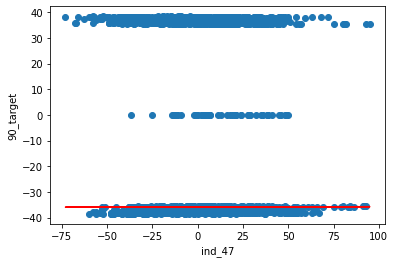

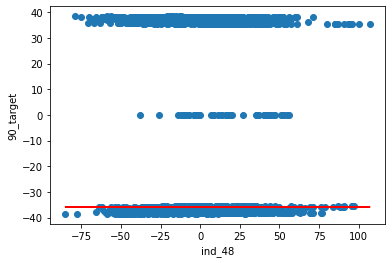

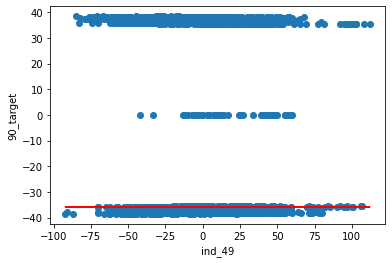

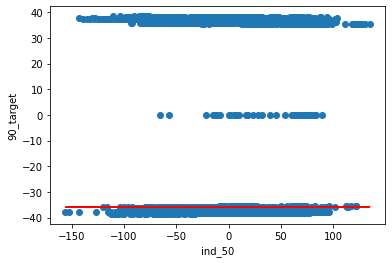

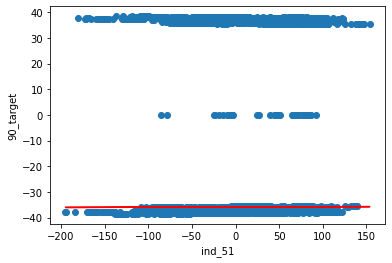

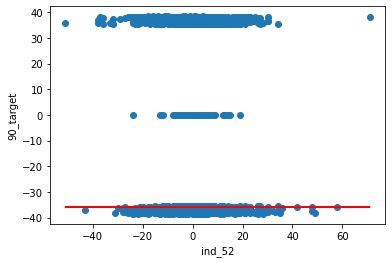

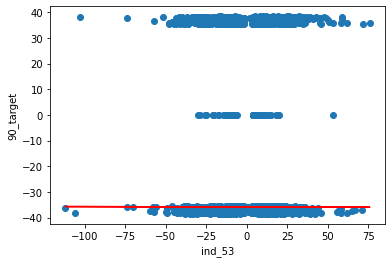

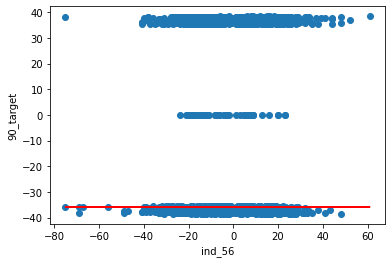

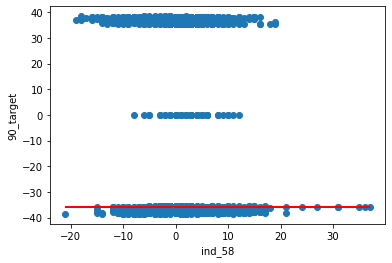

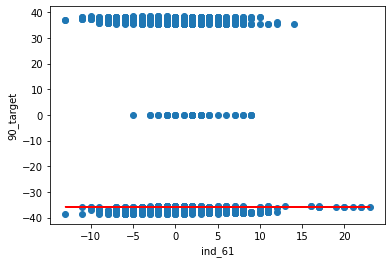

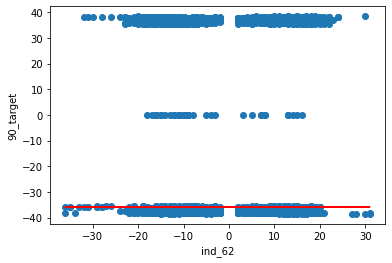

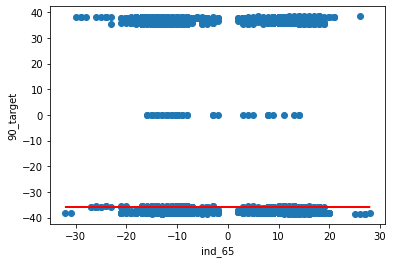

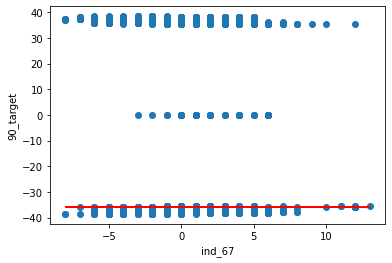

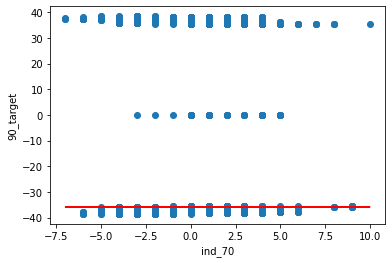

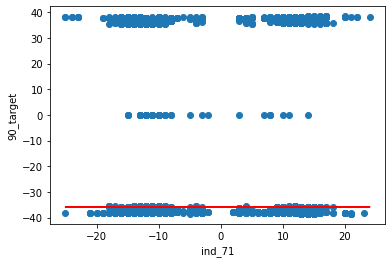

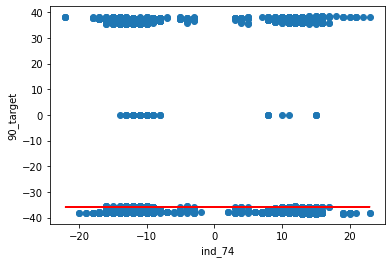

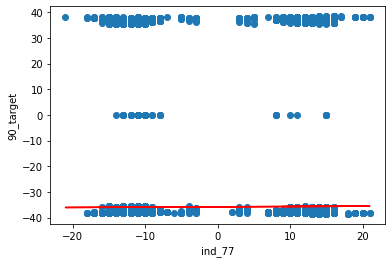

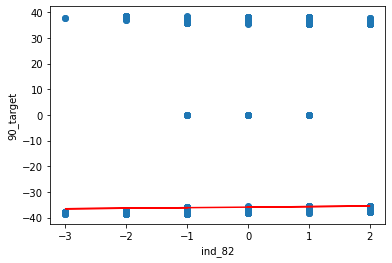

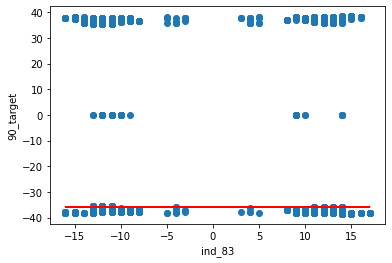

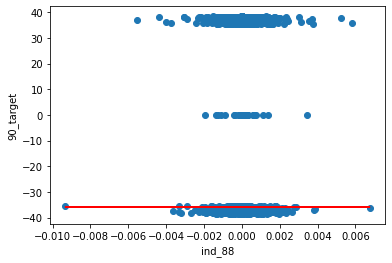

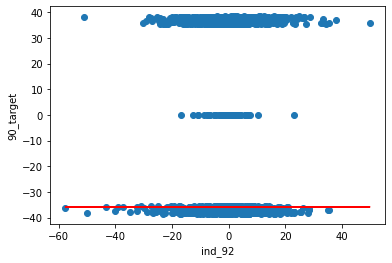

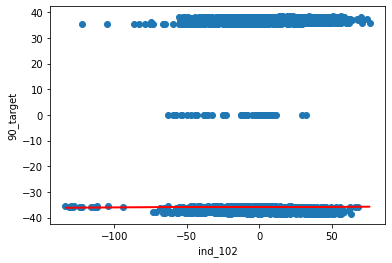

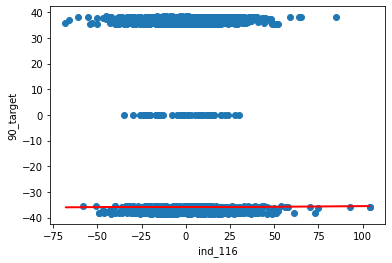

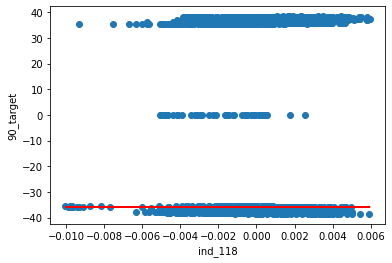

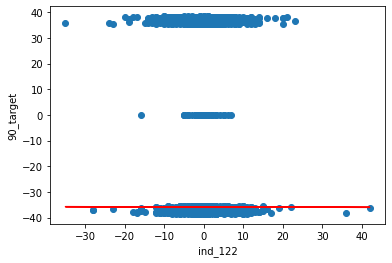

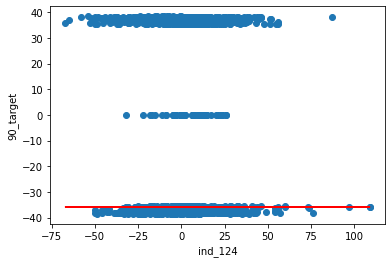

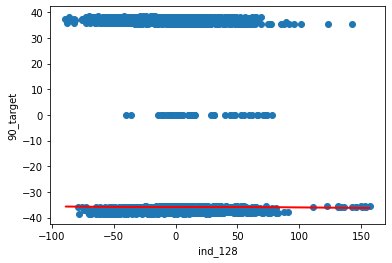

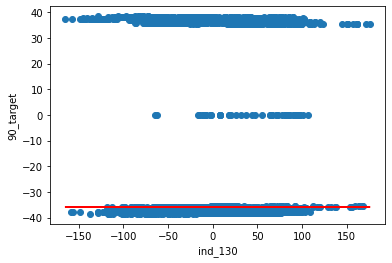

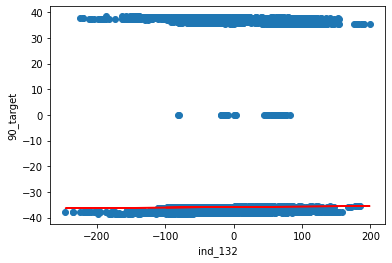

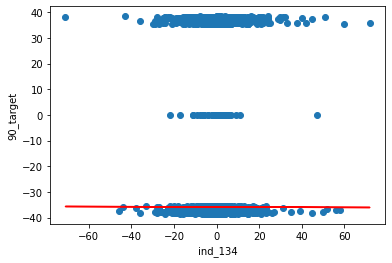

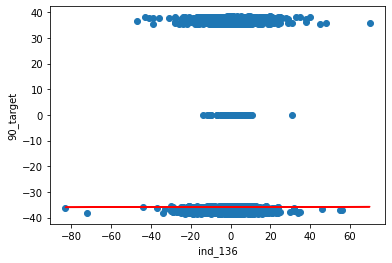

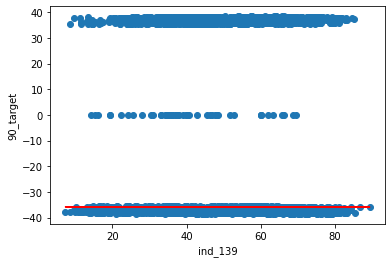

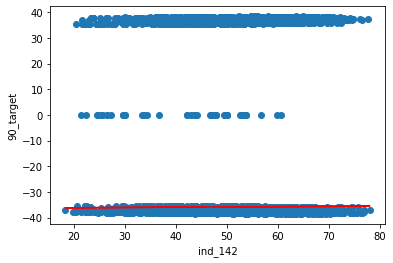

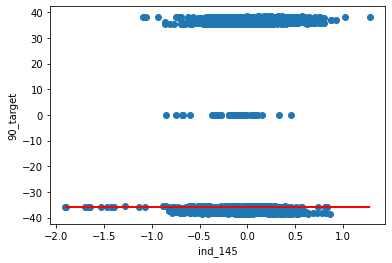

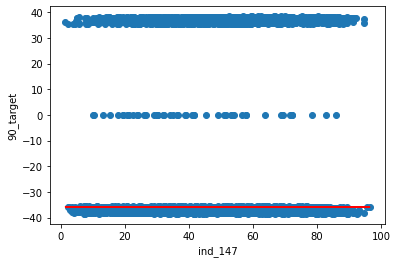

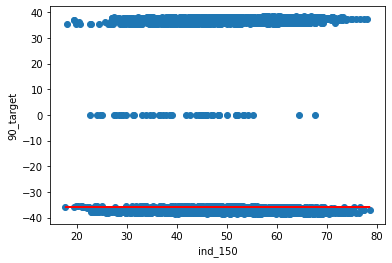

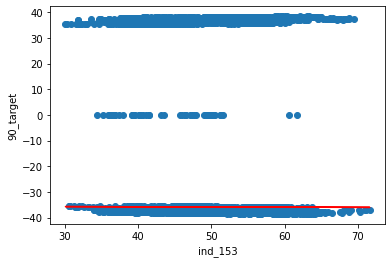

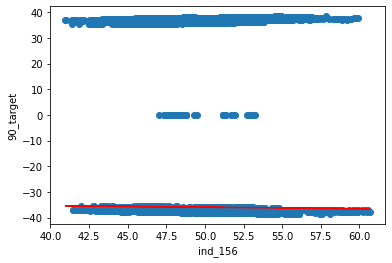

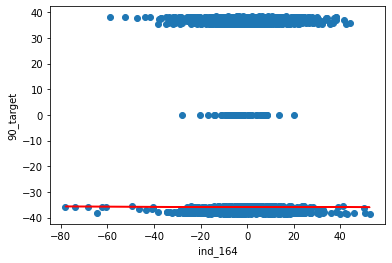

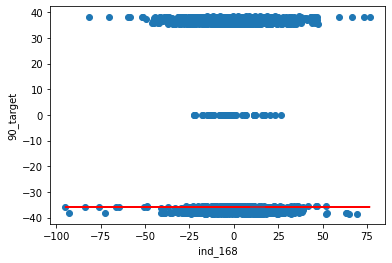

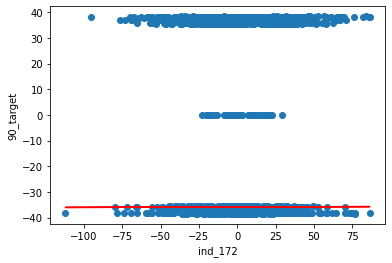

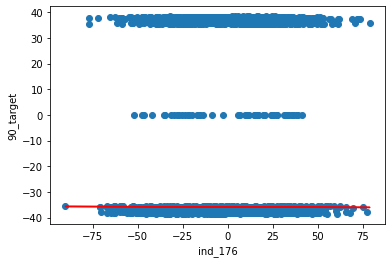

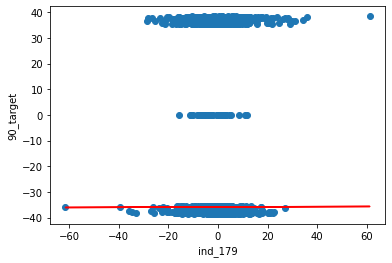

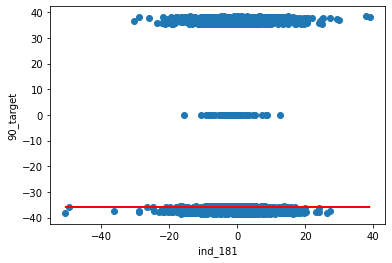

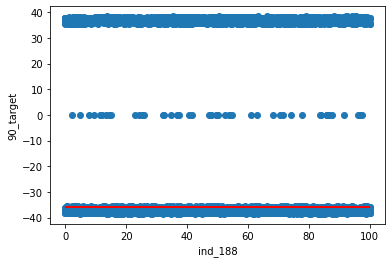

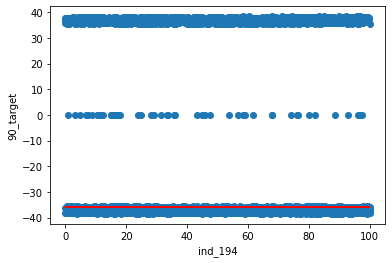

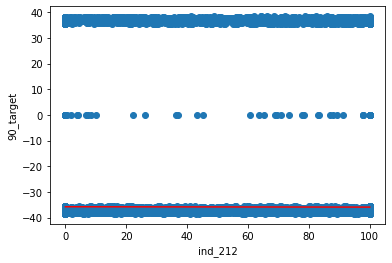

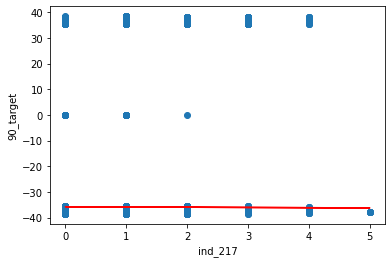

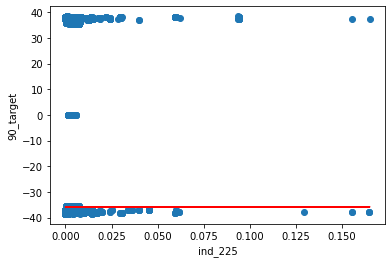

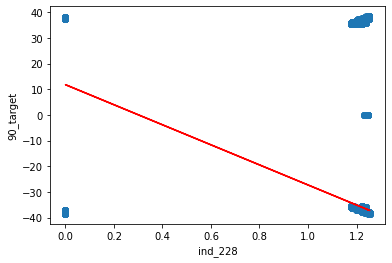

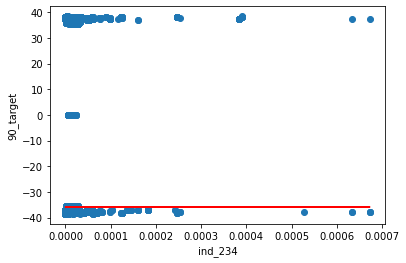

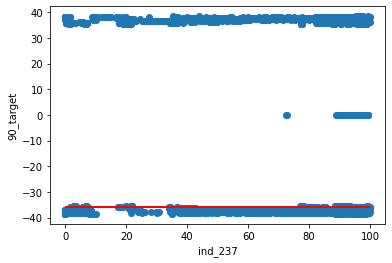

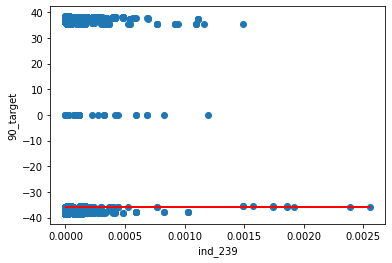

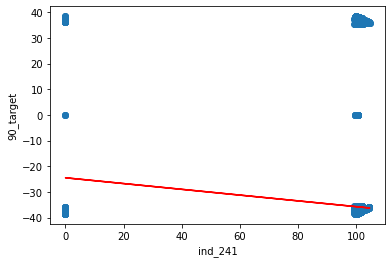

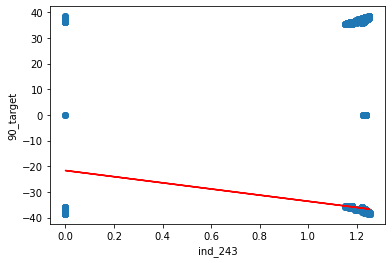

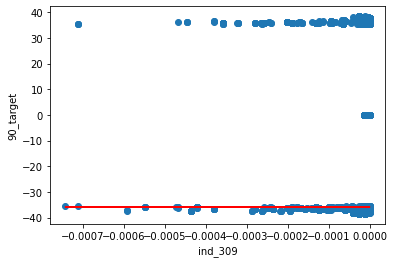

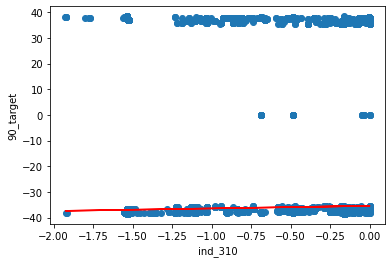

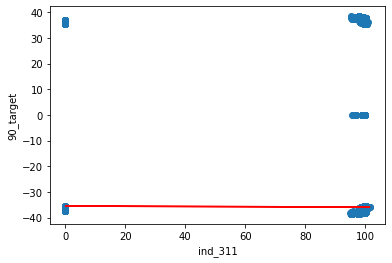

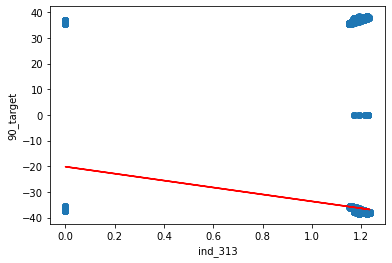

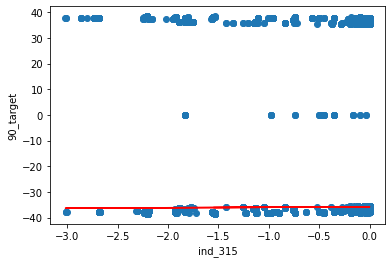

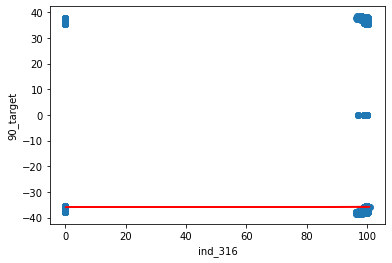

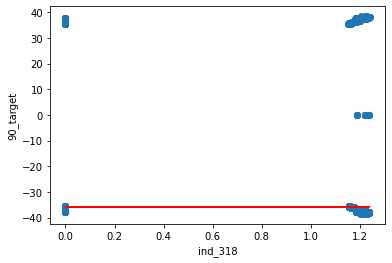

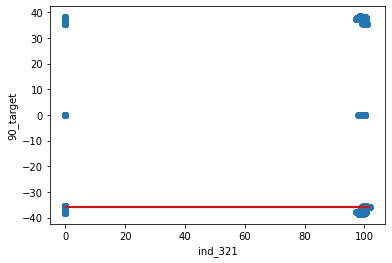

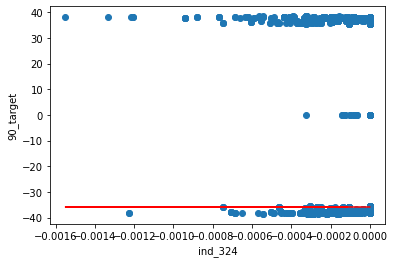

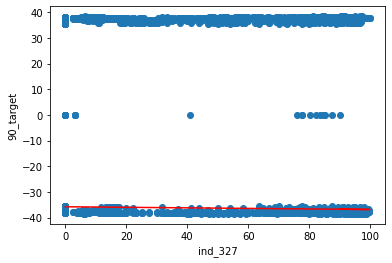

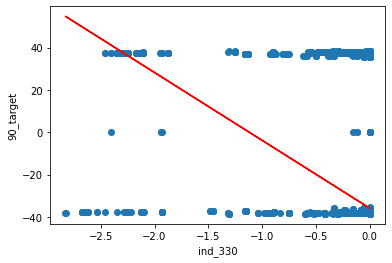

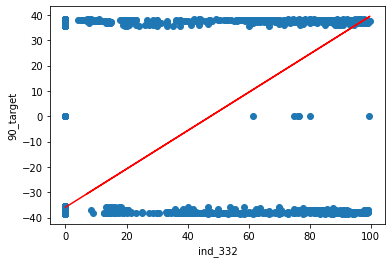

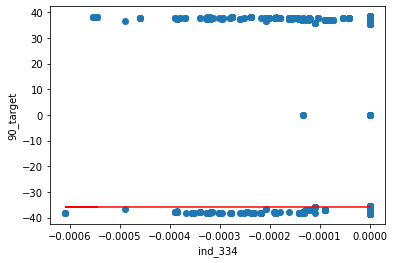

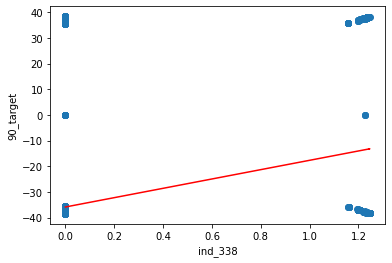

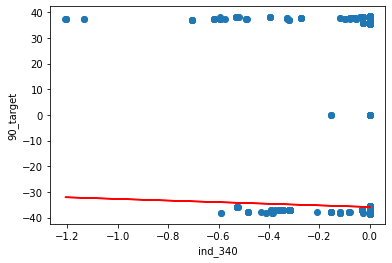

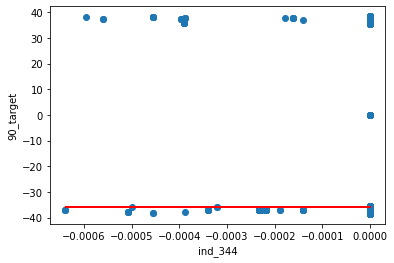

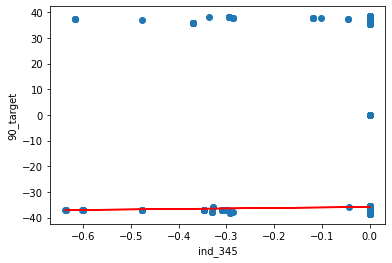

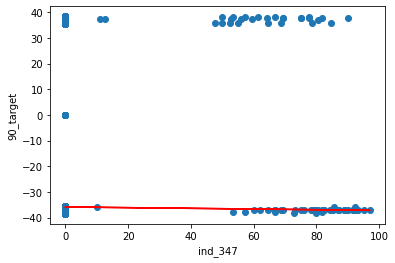

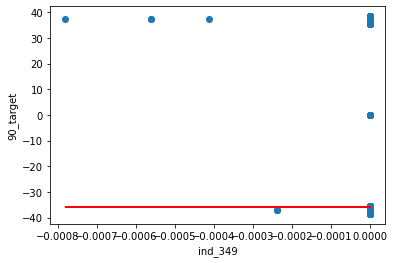

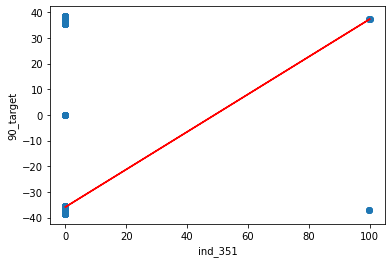

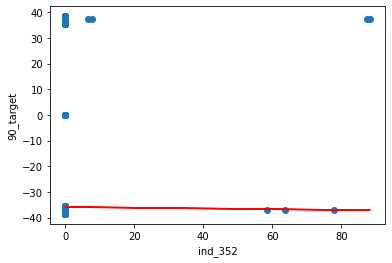

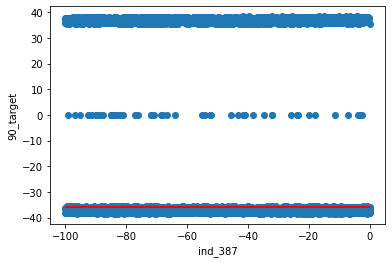

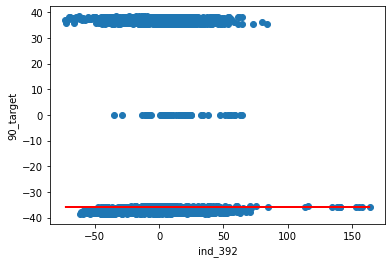

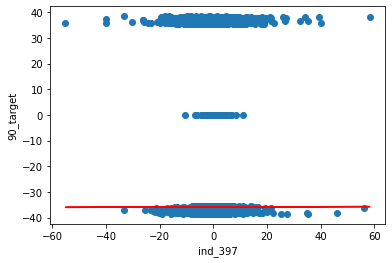

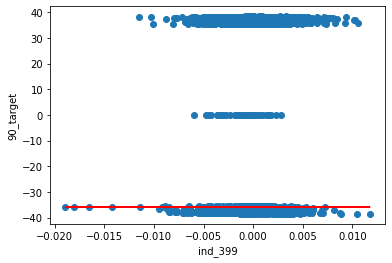

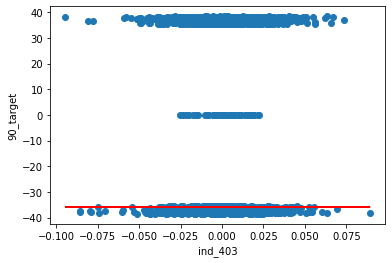

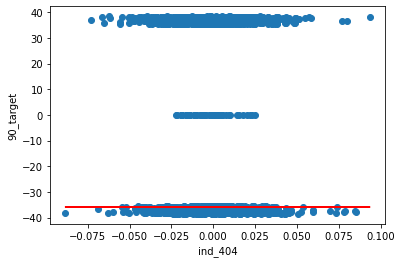

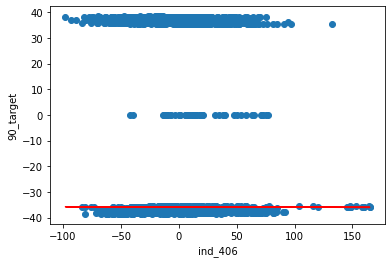

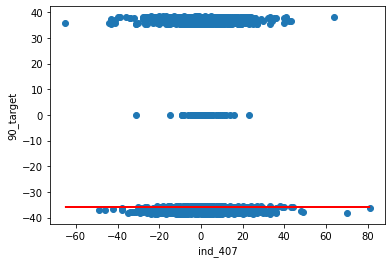

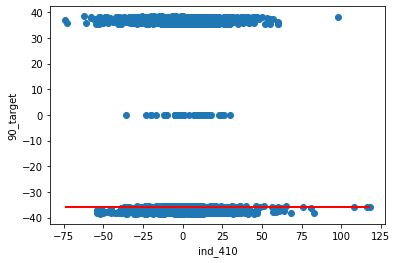

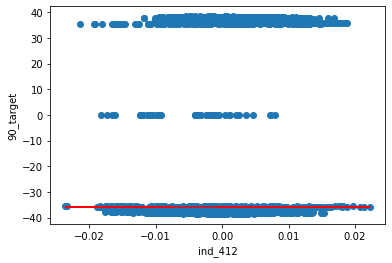

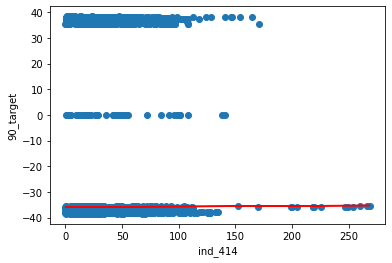

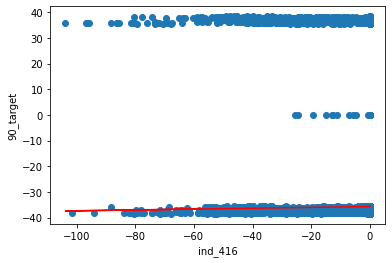

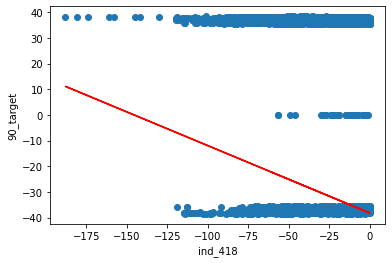

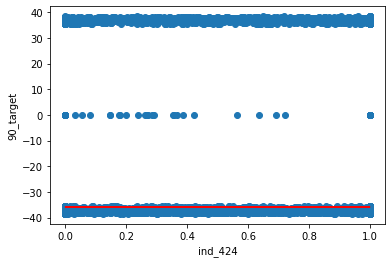

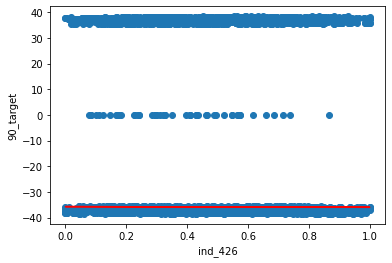

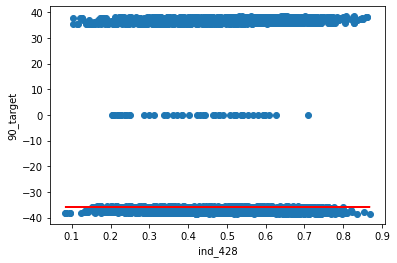

KeyError: '20_target'

In [31]:
for col in nv: 
    X_train_ = pd.DataFrame(X_train[col])
    X_test_ = pd.DataFrame(X_test[col])
    svr_model = SVR("linear").fit(X_train_, y_train)
    y_pred = svr_model.predict(X_train_)
    plt.scatter(X_train_, y_train)
    plt.plot(X_train_, y_pred, color="r")
    plt.xlabel(col)
    plt.ylabel("90_target")
    plt.show()

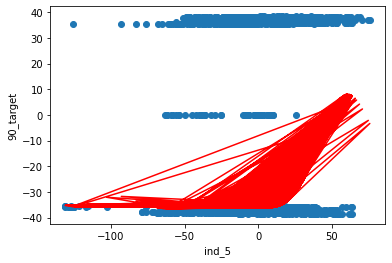

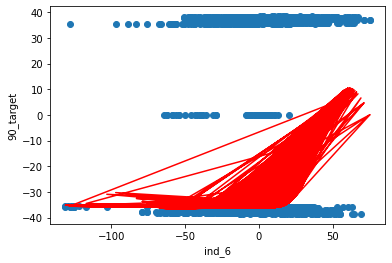

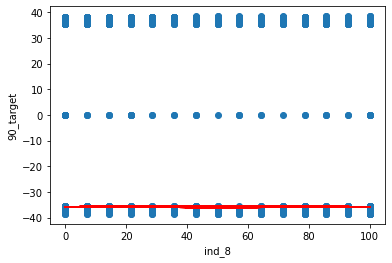

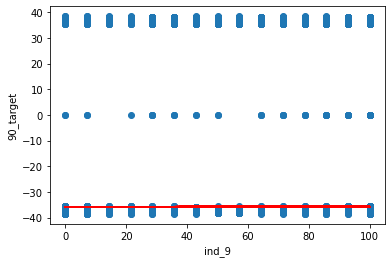

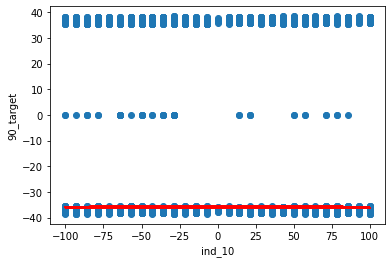

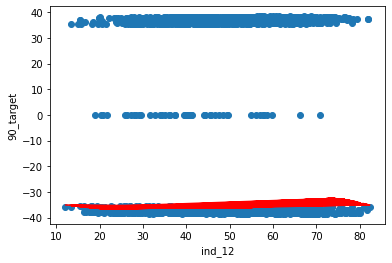

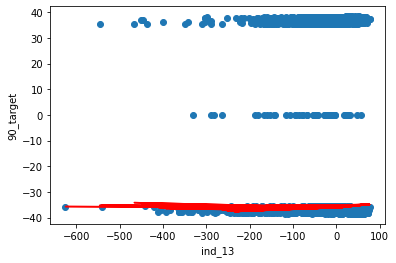

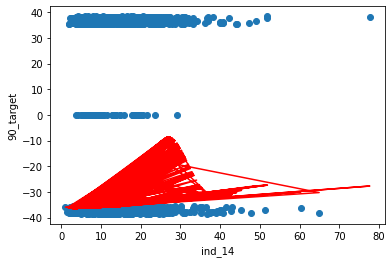

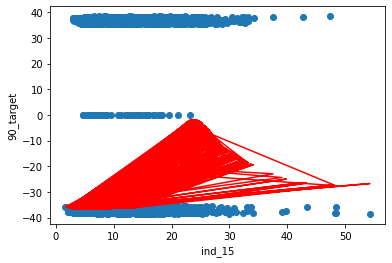

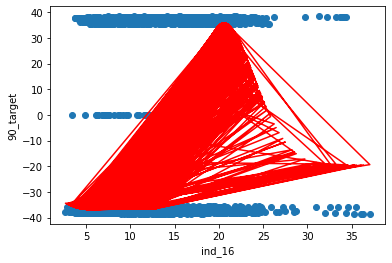

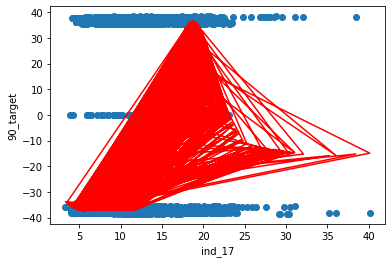

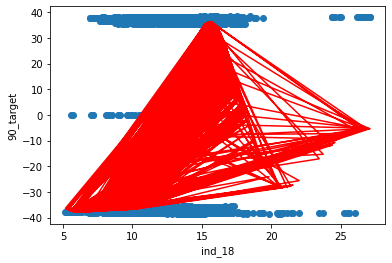

KeyboardInterrupt: 

In [32]:
for col in nv: 
    X_train_ = pd.DataFrame(X_train[col])
    X_test_ = pd.DataFrame(X_test[col])
    svr_model = SVR("rbf").fit(X_train_, y_train)
    y_pred = svr_model.predict(X_train_)
    plt.scatter(X_train_, y_train)
    plt.plot(X_train_, y_pred, color="r")
    plt.xlabel(col)
    plt.ylabel("90_target")
    plt.show()

In [41]:
from sklearn.preprocessing import StandardScaler

dms = pd.get_dummies(df['ind_109'])
y = df["90_target"]
X_ = df.drop(['90_target','20_target', '50_target', 'ind_109', 'ind_420', 'ind_422'], axis=1).astype("float64")
X=pd.concat([X_,dms], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
for col in nv: 
    X_train_ = pd.DataFrame(X_train[col])
    X_test_ = pd.DataFrame(X_test[col])
    
    
    sc_X = StandardScaler()
    sc_y = StandardScaler()
    Xtr = sc_X.fit_transform(X_train_.values)
    Xte = sc_y.fit_transform(X_test_.values.reshape(-1,1))
    
    
    svr_model = SVR("rbf").fit(Xtr, y_train)
    y_pred = svr_model.predict(Xtr)
    plt.scatter(Xtr, y_train)
    plt.plot(Xtr, y_pred, color="r")
    plt.xlabel(col)
    plt.ylabel("90_target")
    plt.show()    

In [45]:
df.corr()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target,90_target
ind_5,1.000000,0.989945,0.543246,-0.533328,0.649225,0.822255,0.768234,-0.014502,-0.026336,-0.041130,...,0.620106,-0.694619,-0.304134,-0.620099,0.076169,0.626439,0.817302,0.060969,0.068989,0.060428
ind_6,0.989945,1.000000,0.514222,-0.495572,0.608947,0.768551,0.713870,-0.006066,-0.019393,-0.035795,...,0.634679,-0.646983,-0.279922,-0.569657,0.021220,0.567359,0.810371,0.062101,0.069652,0.061560
ind_8,0.543246,0.514222,1.000000,-0.374857,0.828650,0.583623,0.482220,0.162635,0.139612,0.038862,...,0.275687,-0.489596,-0.277258,-0.432579,0.144795,0.593799,0.445427,-0.004126,0.006984,-0.006650
ind_9,-0.533328,-0.495572,-0.374857,1.000000,-0.829576,-0.609288,-0.568581,0.238938,0.240048,0.152133,...,-0.276882,0.436275,0.349318,0.505772,-0.173139,-0.631961,-0.450719,-0.031316,-0.004053,0.012093
ind_10,0.649225,0.608947,0.828650,-0.829576,1.000000,0.719409,0.633753,-0.046312,-0.060849,-0.068450,...,0.333229,-0.558311,-0.377913,-0.565931,0.191752,0.739227,0.540428,0.016423,0.006654,-0.011307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ind_426,0.626439,0.567359,0.593799,-0.631961,0.739227,0.776076,0.700736,-0.066201,-0.066437,-0.051049,...,0.293592,-0.571432,-0.356302,-0.594243,0.341017,1.000000,0.584754,0.019599,0.009063,-0.002519
ind_428,0.817302,0.810371,0.445427,-0.450719,0.540428,0.807595,0.727899,0.021970,0.016318,0.010361,...,0.574646,-0.499656,-0.260048,-0.487564,0.188853,0.584754,1.000000,0.047041,0.052418,0.043563
20_target,0.060969,0.062101,-0.004126,-0.031316,0.016423,0.042550,0.041289,0.015320,0.012012,0.026881,...,0.066637,-0.029005,-0.009829,-0.045656,-0.008799,0.019599,0.047041,1.000000,0.384076,0.355950
50_target,0.068989,0.069652,0.006984,-0.004053,0.006654,0.055045,0.048302,0.072728,0.084561,0.101774,...,0.127234,0.008239,0.047728,-0.101488,-0.003372,0.009063,0.052418,0.384076,1.000000,0.940916


In [49]:
#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#2 Importing the dataset

X = df[["90_target"]].values.astype(float)
y = df[["ind_412"]].values.astype(float)
#3 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='rbf')
regressor.fit(X,y)
#5 Predicting a new result
# y_pred = regressor.predict(6.5)

SVR()

In [54]:
y_pred = regressor.predict(X)
y_pred

array([ 0.09792526,  0.09782482, -0.13291584, ..., -0.08376046,
       -0.08526392, -0.08463376])

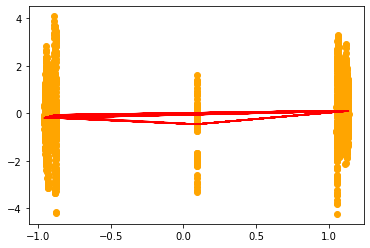

In [58]:
plt.scatter(X, y, color = 'orange')
plt.plot(X, regressor.predict(X), color = 'red')
plt.show()

### Naive Bayes

In [3]:
bank = pd.read_csv("bank.csv")
df = bank.copy()
df = df.dropna()
y = df["bad"]
X = df.drop(["bad", "reason", "job"], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [5]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)

In [6]:
y_pred = nb_model.predict(X_test)

In [7]:
accuracy_score(y_test, y_pred)

0.8993399339933993

In [8]:
cross_val_score(nb_model, X_test, y_test, cv=10).mean()

0.9191256830601093

### BernoulliNB

In [9]:
bnb = BernoulliNB()
bnb_model = bnb.fit(X_train, y_train)
y_pred = bnb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8993399339933993

### MultinomialNB

In [10]:
mnb = MultinomialNB()
mnb_model = mnb.fit(X_train, y_train)
y_pred = mnb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.4389438943894389

In [11]:
cross_val_score(mnb_model, X_test, y_test, cv=10).mean()

0.5842896174863388